<a href="https://colab.research.google.com/github/munichbughunter/udacity_deep_learning_nanodegree/blob/main/Basic/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0,0], X[y==0,1])
  plt.scatter(X[y==1,0], X[y==1,1])

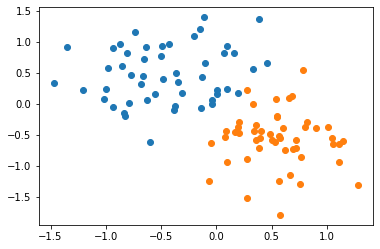

In [5]:
scatter_plot()

In [15]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [16]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [17]:
# Unpacking parameters
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params(): 
  return (w1.item(),w2.item(),b1.item())

In [18]:
def plot_fit(title):
  plt.title = title
  #0 = w1x1 + w2x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

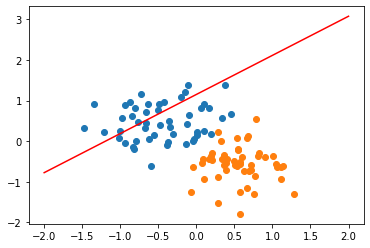

In [19]:
plot_fit('Initial Model')

In [20]:
# cross entropy loss
criterion = nn.BCELoss()
# Gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
# Train model
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('Epoch: ', i, "Loss: ", loss.item())
  losses.append(loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  0.6185115575790405
Epoch:  1 Loss:  0.617464005947113
Epoch:  2 Loss:  0.6164200305938721
Epoch:  3 Loss:  0.6153795123100281
Epoch:  4 Loss:  0.6143423318862915
Epoch:  5 Loss:  0.6133086681365967
Epoch:  6 Loss:  0.612278401851654
Epoch:  7 Loss:  0.6112514734268188
Epoch:  8 Loss:  0.6102280020713806
Epoch:  9 Loss:  0.6092078685760498
Epoch:  10 Loss:  0.6081911325454712
Epoch:  11 Loss:  0.607177734375
Epoch:  12 Loss:  0.6061676740646362
Epoch:  13 Loss:  0.6051609516143799
Epoch:  14 Loss:  0.604157567024231
Epoch:  15 Loss:  0.6031573414802551
Epoch:  16 Loss:  0.6021605730056763
Epoch:  17 Loss:  0.6011670231819153
Epoch:  18 Loss:  0.6001767516136169
Epoch:  19 Loss:  0.5991896986961365
Epoch:  20 Loss:  0.5982059240341187
Epoch:  21 Loss:  0.5972253680229187
Epoch:  22 Loss:  0.5962480306625366
Epoch:  23 Loss:  0.5952739119529724
Epoch:  24 Loss:  0.5943029522895813
Epoch:  25 Loss:  0.5933352112770081
Epoch:  26 Loss:  0.5923706293106079
Epoch:  27 Loss:  

Text(0.5, 0, 'Epoch')

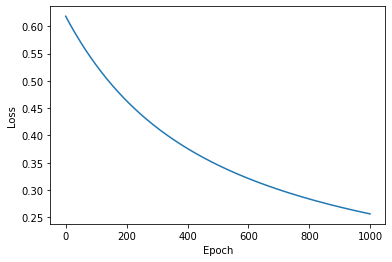

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Red point positive probability = 0.9424158334732056
Red point in class 1
Black point positive probability = 0.05055497586727142
Black point in class 0


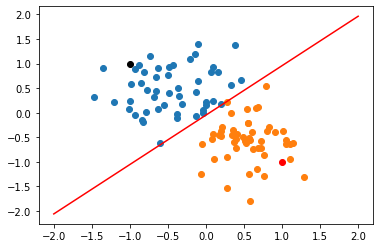

In [26]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Red point in class {}".format(model.predict(point1)))

print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Black point in class {}".format(model.predict(point2)))
plot_fit('Trained Model')